## Домашнее задание 3

Инструкция по сдаче ДЗ: работайте в Google Colab 1) нажмите кнопку выше "Open in Colab" 2) нажмите Copy to Drive. После чего необходимо до дедлайна сделать Share по ссылке с функцией редактирования (Edit) и отправить эту ссылку в форму: https://forms.gle/sbqctKNQtUadNXCh6

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Скачаем данные:

In [ ]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [ ]:
# !powershell iwr -outf somefile https://somesite/somefile

In [ ]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [ ]:
df = pd.read_excel('end_seminar.xlsx')
df.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями?

In [ ]:
print('заявок из групп 18-го года набора:', df[df['18_group'] > 0].shape[0])
print('заявок из групп 17-го года набора:', df[df['17_group'] > 0].shape[0])
a = df.percentile.nunique() #количество уникальных перцентилей
b = df.id.nunique() #количество студнтов, заполнивших таблицу
print('Есть ли студенты с равными перцентилями:', b > a)

заявок из групп 18-го года набора: 223
заявок из групп 17-го года набора: 138
Есть ли студенты с равными перцентилями: True


1) заявок из групп 18-го года набора: 213,
заявок из групп 17-го года набора: 134.

2) Есть студенты с равными перцентилями.

#### 3. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [ ]:
df.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Пропуски есть в столбцах 18_group (138 пропусков), is_mi (343 пропуска), 17_group (223 пропуска), blended (223 пропуска), is_ml_student (304 пропуска)

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

In [ ]:
df.loc[:, df.columns[df.dtypes == 'float']] = df.loc[:, df.columns[df.dtypes == 'float']].fillna(value=0)
df.loc[:, df.columns[df.dtypes == 'object']] = df.loc[:, df.columns[df.dtypes == 'object']].fillna(value='')

In [ ]:
df.isna().sum()

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 4. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. <i>Обращения со значением "Нет" в <code>is_first_time</code> могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [ ]:
print('Количество ответов "Нет":', df[df.is_first_time == 'Нет'].shape[0])

Количество ответов "Нет": 51


In [ ]:
df.drop_duplicates(subset ="id",keep = 'last', inplace=True) 
df[df.is_first_time == 'Нет'].shape[0]

51

Количество ответов "Нет": 51, а после удаления лишних версий: 51.

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом? 

In [ ]:
cour4 = df.loc[df['17_group'] > 0, ['blended', 'rating']]
cour4.blended.value_counts()

DevOps                                   87
Соревновательный анализ данных           32
Введение в дифференциальную геометрию    15
Name: blended, dtype: int64

In [ ]:
cour4.groupby(['blended'])[['rating']].mean()

,rating
blended,
DevOps,1154.172414
Введение в дифференциальную геометрию,1210.733333
Соревновательный анализ данных,1144.218750


 1) blended-курсы для четверокурсников: 'DevOps', 'Введение в дифференциальную геометрию', 'Соревновательный анализ данных'.

2) На DevOps записалось наибольшее количество студентов (87 студентов).

3)Студенты с самым высоким средним рейтингом собрались на Введении в дифференциальную геометрию. 


#### 6. [1 балл] Выясните, есть ли в данных студенты с абсолютно одинаковыми предпочтениями по всем курсам (не забудьте учесть blended-курсы для четверокурсников). Сколько таких наборов, которые взяли несколько студентов? Выведите их все вместе с количеством выбравших их студентов.

<i>Предпочтения двух студентов считаются абсолютно одинаковыми, если выбранные ими дисциплины имеют одинаковый приоритет.</i>

In [ ]:
l = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
same_courses = df.groupby(by=l)[['id']].count()
same_courses = same_courses[same_courses.id > 1]
same_courses

id
fall_1                                          fall_2                                          fall_3                                          spring_1                                           spring_2                                    spring_3                                    blended    
Statistical Learning Theory                     Анализ неструктурированных данных               Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Конфликты и кооперация                      Компьютерное зрение                         DevOps    2
Байесовские методы машинного обучения           Анализ неструктурированных данных               Глубинное обучение в обработке звука            Обучение с подкреплением                           Генеративные модели в машинном обучении     Компьютерное зрение                         DevOps    2
                                                                                                Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Компьютерное зрение                         Генеративные модели в машинном обучении     DevOps    2
Безопасность компьютерных систем                Statistical Learning Theory                     Матричные вычисления                            Дискретная оптимизация                             Промышленное программирование на языке Java Дополнительные главы прикладной статистики            3
                                                Высокопроизводительные вычисления               Анализ неструктурированных данных               Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Конфликты и кооперация                      DevOps    2
                                                                                                Язык SQL                                        Компьютерные сети                                  Промышленное программирование на языке Java Дискретная оптимизация                                3
                                                                                                                                                Промышленное программирование на языке Java        Компьютерные сети                           Системы баз данных                                    2
                                                Матричные вычисления                            Моделирование временных рядов                   Промышленное программирование на языке Java        Компьютерные сети                           Дискретная оптимизация                                2
                                                Сбор и обработка данных с помощью краудсорсинга Матричные вычисления                            Компьютерные сети                                  Промышленное программирование на языке Java Анализ данных в бизнесе                               2
                                                Теория баз данных                               Язык SQL                                        Машинное обучение 2                                Компьютерные сети                           Промышленное программирование на языке Java           2
Высокопроизводительные вычисления               Безопасность компьютерных систем                Сбор и обработка данных с помощью краудсорсинга Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Компьютерное зрение                         DevOps    2
                                                Сбор и обработка данных с помощью краудсорсинга Моделирование временных рядов                   Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Методы сжатия и передачи медиаданных        DevOps    2
Моделирование временных рядов                   Сбор и обработка данных с помощью краудсорсинга Безопасность компьютерных систем                Компьютерные сети 

In [ ]:
same_courses.shape[0]

15

15 наборов взяли несколько студентов

(В таблице same_courses число в столбце id соответствует количеству студентов, которые выбрали этот набор курсов)

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [ ]:
selected_18 = set(pd.unique(df.loc[df["18_group"] > 0, l].values.ravel('K')))
selected_17 = set(pd.unique(df.loc[df["17_group"] > 0, l].values.ravel('K')))
selected_17_18 = selected_18 & selected_17
selected_17_18

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Курсы, на которые записались и студенты 18-го года набора и студенты 17-го года набора: 

'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
only_18 = selected_18 - selected_17_18
only_18

{'',
 'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'}

Курсы только для студентов 18-го года:

 'Анализ данных в бизнесе',
 'Дискретная оптимизация',
 'Дополнительные главы прикладной статистики',
 'Компьютерные сети',
 'Матричные вычисления',
 'Машинное обучение 2',
 'Промышленное программирование на языке Java',
 'Системы баз данных',
 'Теория баз данных',
 'Язык SQL'

In [ ]:
only_17 = selected_17 - selected_17_18
only_17

{'DevOps',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Введение в дифференциальную геометрию',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления',
 'Соревновательный анализ данных'}

Курсы только для студентов 17-го года:

'DevOps',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Введение в дифференциальную геометрию',
 'Генеративные модели в машинном обучении',
 'Глубинное обучение в обработке звука',
 'Компьютерное зрение',
 'Конфликты и кооперация',
 'Методы сжатия и передачи медиаданных',
 'Обучение с подкреплением',
 'Проектирование и разработка высоконагруженных сервисов',
 'Символьные вычисления',
 'Соревновательный анализ данных'

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Полезные строчки:
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [ ]:
def day_from_timestamp(x):
    x = str(x).split()
    year, month, day = x[0].split('-')
    return f'{day}.{month}.{year[-2:]}'

day_rating = df.loc[:,['timestamp', 'rating']].copy()
day_rating.loc[:, 'timestamp'] = day_rating.loc[:, 'timestamp'].apply(day_from_timestamp)
day_rating = day_rating.groupby('timestamp')['rating'].mean()
day_rating

timestamp
14.05.20    1160.277778
15.05.20     719.866667
16.05.20     736.400000
17.05.20     915.027027
18.05.20     827.352679
19.05.20     761.142857
20.05.20     689.500000
21.05.20     584.000000
23.05.20    1080.500000
24.05.20     670.500000
Name: rating, dtype: float64

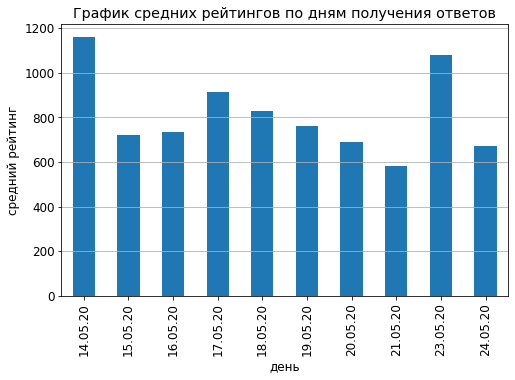

In [ ]:
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
ax = day_rating.plot.bar(x='timestamp', y='rating')
plt.title('График средних рейтингов по дням получения ответов')
plt.xlabel('день')
plt.ylabel('средний рейтинг')
ax.grid(axis = 'y')

Сохраните график в формате pdf (так он останется векторизованным).

In [ ]:
plt.rcParams['savefig.format'] = 'pdf'
ax.get_figure().savefig(fname='graphic_rating.pdf')
ax

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов **по осенним** курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. <i>Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются. Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо</i>.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
df['fall_courses_amount'] = [1]*df.shape[0]
df.loc[(df['17_group'].isin([171, 172, 173])) | (df.is_mi == 1), ['fall_courses_amount']] = 2

Проверка:

In [ ]:
col_name = 'fall_courses_amount'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

1. Составим список всех осенних курсов.

In [ ]:
l = ['fall_1', 'fall_2', 'fall_3']
selected_18 = set(pd.unique(df.loc[df["18_group"] > 0, l].values.ravel('K')))
selected_17 = set(pd.unique(df.loc[df["17_group"] > 0, l].values.ravel('K')))
courses = list(selected_17 | selected_18)
courses

['Анализ неструктурированных данных',
 'Высокопроизводительные вычисления',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Матричные вычисления',
 'Язык SQL',
 'Безопасность компьютерных систем',
 'Теория баз данных',
 'Байесовские методы машинного обучения',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Statistical Learning Theory',
 'Глубинное обучение в обработке звука']

2. Создадим таблицу, в которой и будет распределение по осенним курсам.

In [ ]:
dist = pd.DataFrame(columns=['id', 'course1', 'course2']) #distribution
dist['id'] = df.id.copy()
dist = dist.fillna('-')

3. Каждому курсу сопоставим следующую информацию о нем:

1) количество мест на этом курсе N

2) список студентов, выбравших этот курс первым по приоритету (в порядке убывания рейтинга) list1

3) список студентов, выбравших этот курс вторым по приоритету (в порядке убывания рейтинга) list2

4) список студентов, выбравших этот курс третьим по приоритету (в порядке убывания рейтинга) list3

In [ ]:
inf = dict()
for course in courses:
    if course in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
        N =60
    elif course == 'Анализ неструктурированных данных' :
        N = 400
    else:  
        N = 30 
    list1, list2, list3 = [], [], []
    df_i = df.query(f"(fall_1 == '{course}') or (fall_2 == '{course}' and fall_courses_amount == 2)").sort_values(by=['percentile'])
    list1 = list(df_i['id'].values)
    df_i = df.query(f"(fall_2 == '{course}') or (fall_3 == '{course}' and fall_courses_amount == 2)").sort_values(by=['percentile'])
    list2 = list(df_i['id'].values)
    df_i = df.query(f"fall_3 == '{course}' and fall_courses_amount == 1").sort_values(by=['percentile'])
    list3 = list(df_i['id'].values)
    inf.setdefault(course, [N, list1, list2, list3])

4. Проведем все три волны отбора на курсы.

In [ ]:
one_course = list(df.loc[df.fall_courses_amount == 1, 'id'].values) # список id студентов, выбирающих 1 курс
two_courses = list(df.loc[df.fall_courses_amount == 2, 'id'].values) # список id студентов, выбирающих 2 курса
passed = set() # множество студентов, которым уже подобрали курс или два курса (если они в тех группах, где надо два курса)
for i in range(1, 4): #проводим 3 волны (i-я волна, где i = 1, i = 2 или i = 3)
    for course in courses: #взяли один курс из списка всех курсов
        #N, list1, list2, list3 = inf[course][0], inf[course][1], inf[course][2], inf[course][3]
        #x - количество студентов, которое нужно набрать на курс
        if i == 1:
            x = inf[course][0] # до проведения волн на курс надо набрать заявленное число N = inf[course][0] студентов
        elif i==2:
            x = inf[course][0] - len(inf[course][1]) #после первой волны на курс надо набрать x = [N - (кол-во студентов из list1)] студентов (если x <=  0, то вторая волна проводиться не будет)
        else:
            #passed_by_list2 - множество студентов, которые указали курс вторым по приоритету и которым в итоге достался этот курс (на курс, который они указали первым приоритетом, они не прошли по рейтингу)
            passed_by_list2 = (set(dist.loc[dist.course1 == course, 'id'].values) & set(inf[course][2])) | (set(dist.loc[dist.course2 == course, 'id'].values) & set(inf[course][2]))
            x = inf[course][0] - len(inf[course][1]) - len(passed_by_list2 ) 
        if x > 0: # i-я волна проводится только, если на курсе еще остались места
            cand = [a for a in inf[course][i] if not a in passed] #кандидаты на этот курс - студенты, указавшие курс i-м приоритетом, которым еще не подобрали курс 
            if len(cand) > x: #если кандидатов слишком много возмем первых x по рейтингу
                cand = cand[0: x: 1]
            # прошедших кандидатов запишем на курс
            dist.loc[(dist.id.isin(cand)) & (dist.course1 == '-'), 'course1'] = course
            dist.loc[(((dist.id.isin(cand)) & (dist.course1 != '-')) & (dist.id.isin(two_courses))) & (dist.course1 != course), 'course2'] = course
            #обновим множество студенов, которым уже подобрали курс
            passed = set(dist.loc[(dist.course1 != '-') & (dist.id.isin(one_course)), 'id'].values) | set(dist.loc[(dist.course1 != '-') & (dist.course2 != '-'), 'id'].values)
#поставим "???" студентам, которым не удалось попасть на курс (или на два курса)
dist.loc[((dist['course1'] == '-') & (dist['course2'] == '-')) & (dist.id.isin(two_courses)), ['course1', 'course2']] = ['???', '???'] 
dist.loc[(dist['course1'] == '-') & (dist['course2'] == '-'), 'course1'] = '???'
dist.loc[((dist['course1'] != '-') & (dist['course2'] == '-')) & (dist.id.isin(two_courses)), ['course2']] = '???'
dist.rename(columns={'id' : 'ID'}, inplace=True)

In [ ]:
from google.colab import files
dist.to_csv('res_fall.csv', index=None) 
files.download('res_fall.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')

In [ ]:
best_in_show = check_df.loc[check_df.is_first_place == True, 'id'].values
df.loc[df.id.isin(best_in_show), 'is_first_place'] = True
failed = check_df.loc[check_df.is_last_place == True, 'id'].values
df.loc[df.id.isin(failed), 'is_last_place'] = True

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
fir_col_name = 'is_first_place'
last_col_name = 'is_last_place'     


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       == 
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/32666/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

ссылка: https://contest.yandex.ru/contest/32666/run-report/61113599/

ник: mariakovaleva55555